# Correlations
Version: April 9th, 2024

---

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

In [3]:
sectors = pd.read_csv('data/sectors.csv')

In [4]:
sectors = sectors[sectors['YEAR']!=2017]

In [5]:
companies = sectors.groupby('COMPANY NAME').median(numeric_only=True).reset_index().drop(columns='YEAR').drop(columns='COMPANY SIZE')

Calculate correlation coefficients according to Kendall Tau because this method is preferred in the case of small sample sizes or the presence of outliers 

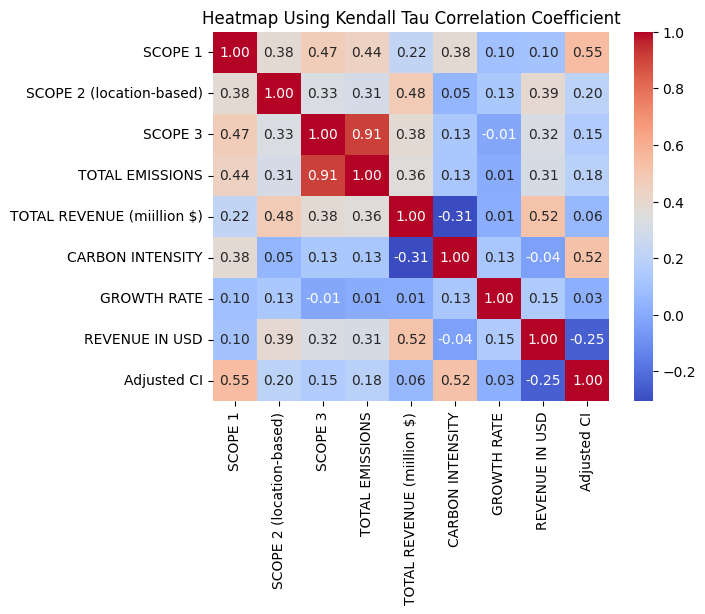

In [6]:
corr = companies.corr(method='kendall', numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap Using Kendall Tau Correlation Coefficient')
plt.show();


In [7]:
corr

,SCOPE 1,SCOPE 2 (location-based),SCOPE 3,TOTAL EMISSIONS,TOTAL REVENUE (miillion $),CARBON INTENSITY,GROWTH RATE,REVENUE IN USD,Adjusted CI
SCOPE 1,1.000000,0.378049,0.469953,0.443590,0.219973,0.382646,0.095816,0.103914,0.546559
SCOPE 2 (location-based),0.378049,1.000000,0.329507,0.305128,0.479082,0.046942,0.133603,0.390013,0.201080
SCOPE 3,0.469953,0.329507,1.000000,0.908185,0.381495,0.133734,-0.014235,0.324555,0.153737
TOTAL EMISSIONS,0.443590,0.305128,0.908185,1.000000,0.360324,0.132290,0.009447,0.309042,0.184885
TOTAL REVENUE (miillion $),0.219973,0.479082,0.381495,0.360324,1.000000,-0.305832,0.012146,0.516869,0.058030
CARBON INTENSITY,0.382646,0.046942,0.133734,0.132290,-0.305832,1.000000,0.126600,-0.038407,0.522048
GROWTH RATE,0.095816,0.133603,-0.014235,0.009447,0.012146,0.126600,1.000000,0.149798,0.025641
REVENUE IN USD,0.103914,0.390013,0.324555,0.309042,0.516869,-0.038407,0.149798,1.000000,-0.246964
Adjusted CI,0.546559,0.201080,0.153737,0.184885,0.058030,0.522048,0.025641,-0.246964,1.000000


## Sectors Merged with Commitments